In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

#Use to hide unimportant or unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

spark = SparkSession.builder.appName("Project").getOrCreate()

df = spark.read.csv("Customers.csv", header= True, inferSchema=True)
df.toPandas()

    

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [2]:
df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(10).toPandas()

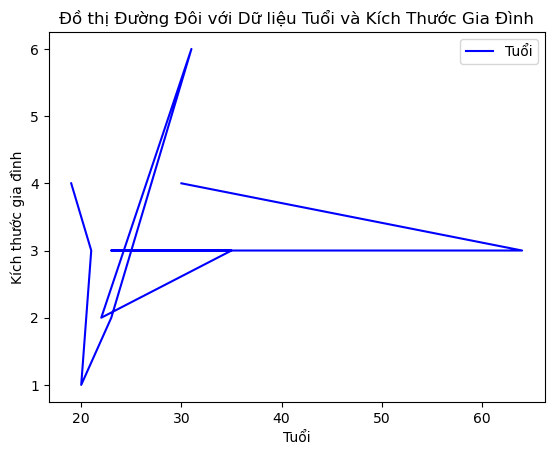

In [3]:
import matplotlib.pyplot as plt

plt.plot(df_seaborn_selected_ageAndFamilySize["Age"], df_seaborn_selected_ageAndFamilySize["Family size"], label='Tuổi', color='blue')


# Đặt nhãn cho trục X
plt.xlabel("Tuổi")
# Đặt nhãn cho trục Y
plt.ylabel("Kích thước gia đình")
# Đặt tiêu đề cho đồ thị
plt.title("Đồ thị Đường Đôi với Dữ liệu Tuổi và Kích Thước Gia Đình")
# Thêm chú thích vào đồ thị
plt.legend()
# Hiển thị đồ thị
plt.show()


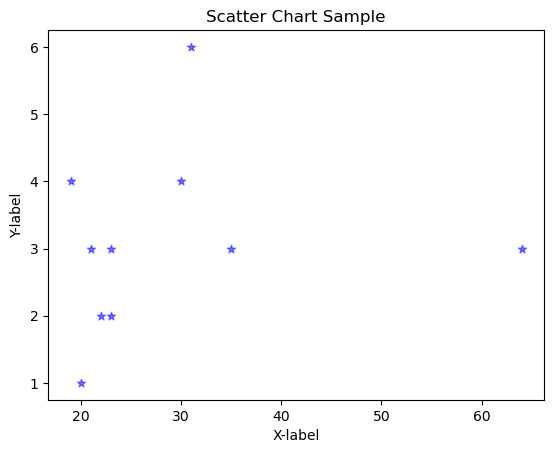

In [4]:
import matplotlib.pyplot as plt

df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(10).toPandas()
plt.scatter(df_seaborn_selected_ageAndFamilySize["Age"], df_seaborn_selected_ageAndFamilySize["Family size"], c='blue', marker='*',alpha=0.5)
plt.xlabel("X-label")


plt.ylabel("Y-label")
plt.title("Scatter Chart Sample")
plt.show()

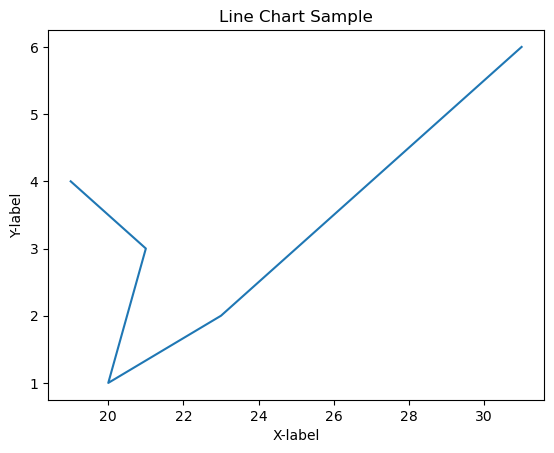

In [5]:
import matplotlib.pyplot as plt

df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(5).toPandas()
plt.plot(df_seaborn_selected_ageAndFamilySize["Age"], df_seaborn_selected_ageAndFamilySize["Family size"])

plt.xlabel("X-label")
plt.ylabel("Y-label")
plt.title("Line Chart Sample")
plt.show()


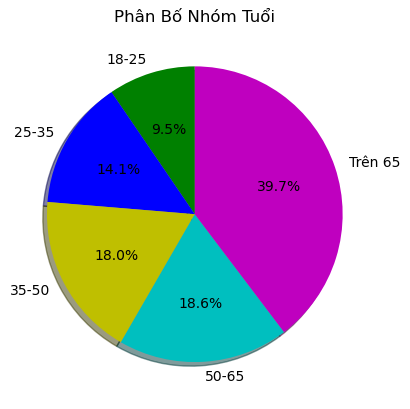

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").toPandas()

# Giả định 'Age' là một cột trong DataFrame df_seaborn_selected_ageAndFamilySize
# Định nghĩa các bins cho các nhóm tuổi
bins = [ 18, 25, 35, 50, 65, float('inf')]
# Định nghĩa nhãn cho mỗi nhóm tuổi
labels = ['18-25', '25-35', '35-50', '50-65', 'Trên 65']

# Sử dụng pd.cut để tạo ra một cột mới 'Age Group' phân loại độ tuổi theo các bins và nhãn đã định
df_seaborn_selected_ageAndFamilySize['Age Group'] = pd.cut(df_seaborn_selected_ageAndFamilySize['Age'], bins=bins, labels=labels, right=False)

# Đếm số lượng trong mỗi nhóm tuổi
age_group_counts = df_seaborn_selected_ageAndFamilySize['Age Group'].value_counts(sort=False)

# Plot the pie chart
plt.pie(age_group_counts,
        labels=age_group_counts.index,
        colors=[ 'g', 'b', 'y', 'c', 'm'],  # Mỗi nhóm tuổi sẽ có một màu sắc
        startangle=90,
        shadow=True,
        autopct='%1.1f%%')

# Add title to the chart
plt.title("Phân Bố Nhóm Tuổi")

# Draw the chart
plt.show()


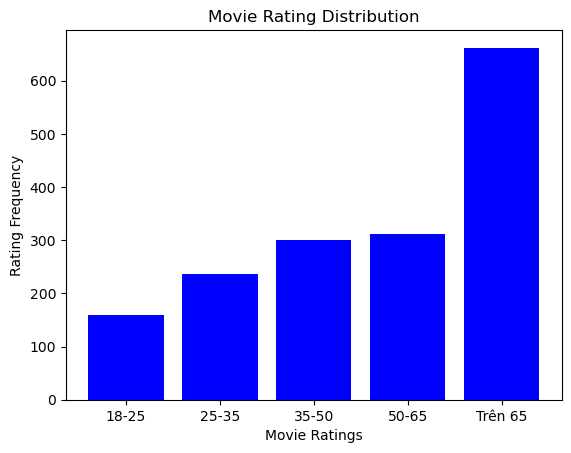

In [7]:
# Add the essential library matplotlib
import matplotlib.pyplot as plt
# create the data


plt.bar(labels, age_group_counts, color='blue')
plt.xlabel("Movie Ratings")
plt.ylabel("Rating Frequency")
plt.title("Movie Rating Distribution")
plt.show()

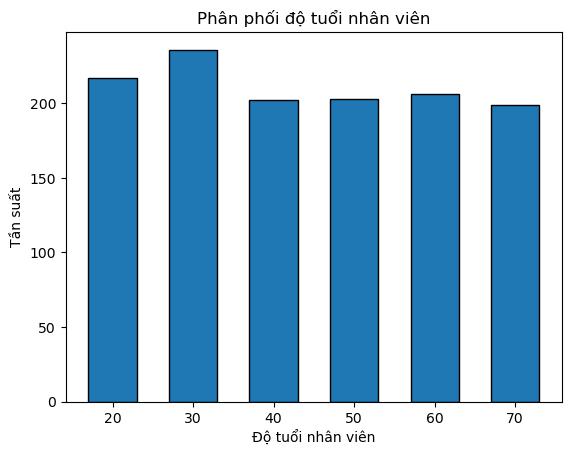

In [8]:
import matplotlib.pyplot as plt

# Giả 3333333333333333333333sử 'Age' là cột tuổi trong DataFrame df_seaborn_selected_ageAndFamilySize của bạn
ages = df_seaborn_selected_ageAndFamilySize['Age']

# Define the bins for age groups
bins = [15, 25, 35, 45, 55, 65, 75]

# Plot the histogram
plt.hist(ages, bins=bins, edgecolor='black', rwidth=0.6)

# Set the X-axis label
plt.xlabel("Độ tuổi nhân viên")

# Set the Y-axis label
plt.ylabel("Tần suất")

# Set the title of the graph
plt.title("Phân phối độ tuổi nhân viên")

# Show the plot
plt.show()


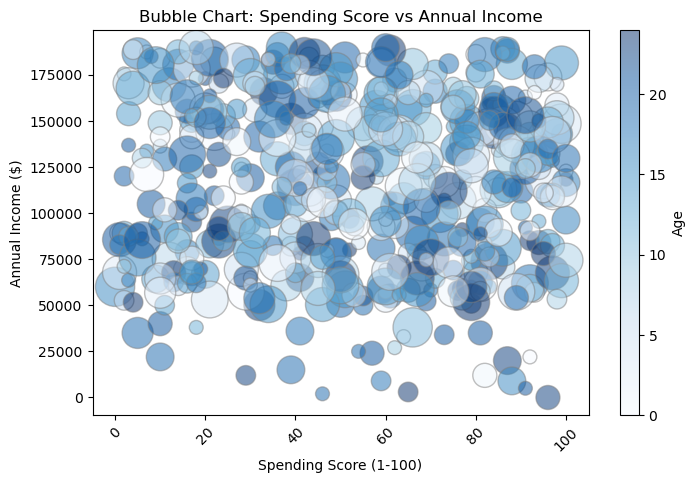

In [9]:
# Assuming your PySpark DataFrame is named df
# and you have already run df = spark.read.csv(...)

# Filter the DataFrame for individuals under 25
df_under_25 = df.filter(df['Age'] < 25)

# Convert the filtered DataFrame to Pandas for visualization
df_under_25_pandas = df_under_25.toPandas()

# Set figure size
plt.figure(figsize=(8, 5))

# Assuming that we want to plot 'Spending Score (1-100)' vs 'Annual Income ($)' 
# and use 'Family Size' as the size of the bubble
# Here, we're using 'Age' as the bubble color
colors = df_under_25_pandas['Age']

# Draw the scatter diagram
plt.scatter(
    x=df_under_25_pandas['Spending Score (1-100)'], 
    y=df_under_25_pandas['Annual Income ($)'], 
    s=df_under_25_pandas['Family Size']*100,  # Adjust size multiplier as needed
    c=colors, 
    cmap="Blues", 
    edgecolors="grey", 
    alpha=0.5
)

# Add labels and title
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income ($)")
plt.title("Bubble Chart: Spending Score vs Annual Income")

# rotate x label for clear visualization
plt.xticks(rotation=45)

# Show a color bar which maps values to colors.
plt.colorbar(label='Age')

# Show the plot
plt.show()


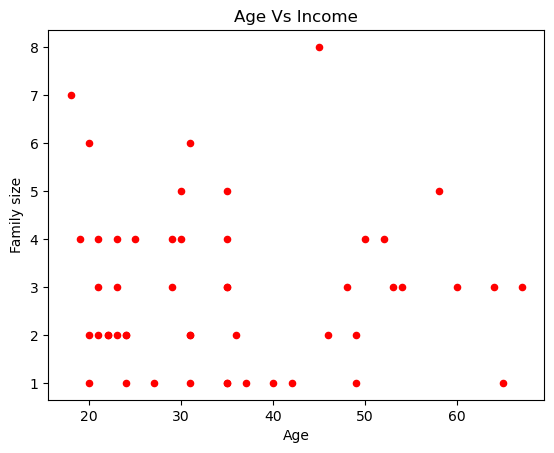

In [10]:
# Import the required modules
import pandas as pd
import matplotlib.pyplot as plt

df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(50).toPandas()

df_seaborn_selected_ageAndFamilySize.plot(kind='scatter', x='Age', y='Family size', color='red', title='Age Vs Income')
# Show figure
plt.show()


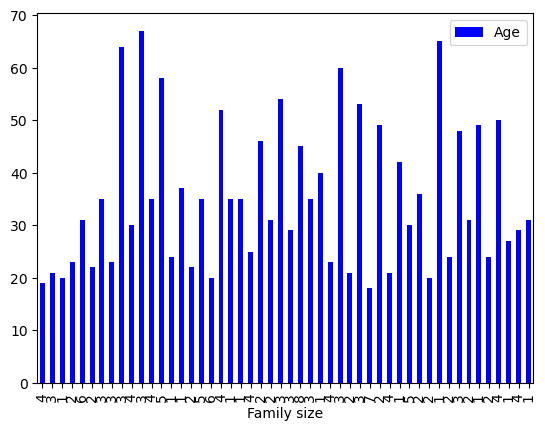

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(50).toPandas()

df_seaborn_selected_ageAndFamilySize.plot(kind='bar',x='Family size', y='Age', color='blue')
plt.show()


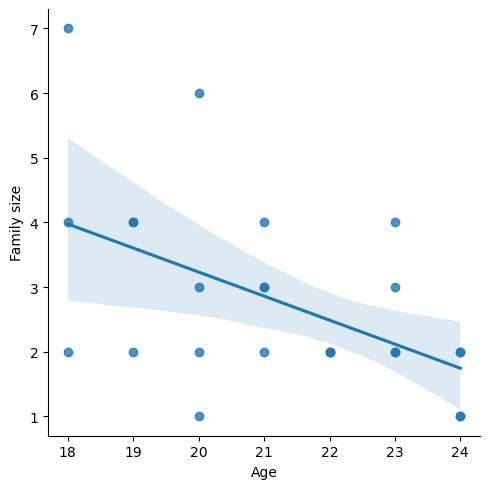

In [12]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is a PySpark DataFrame and has been loaded correctly.

# Select the 'Age' and 'Family size' columns, limit to 25 entries, and convert to pandas DataFrame
df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(100).toPandas()

# Filter for rows where 'Age' is less than 25 using pandas syntax
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 25]

# Plot the data using seaborn's lmplot, which adds a linear regression line by default
sns.lmplot(x='Age', y='Family size', data=df_seaborn_selected_ageAndFamilySize)

# Show the figure
plt.show()


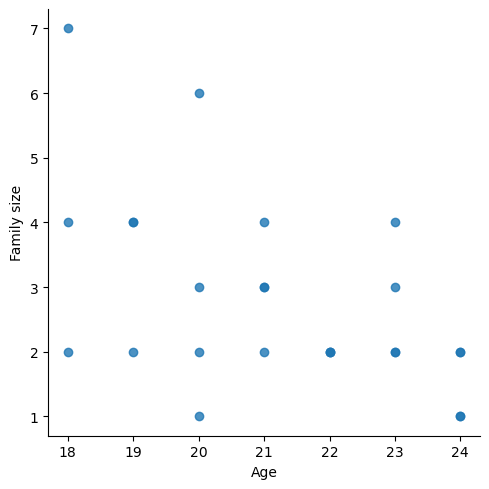

In [13]:
sns.lmplot(x='Age', y='Family size', data=df_seaborn_selected_ageAndFamilySize, fit_reg=False)
plt.show()

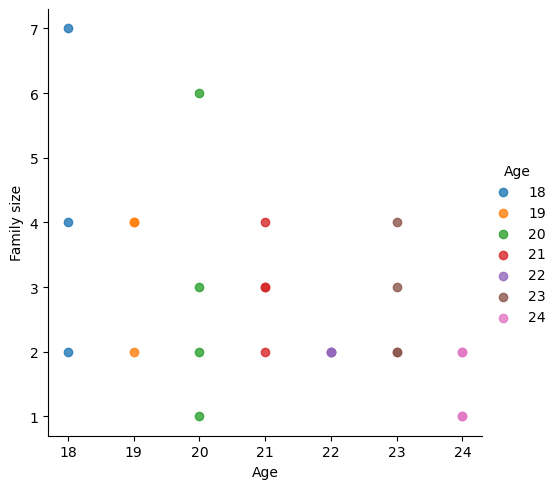

In [14]:

sns.lmplot(x='Age', y='Family size', data=df_seaborn_selected_ageAndFamilySize, fit_reg=False, hue='Age')
# Show figure
plt.show()


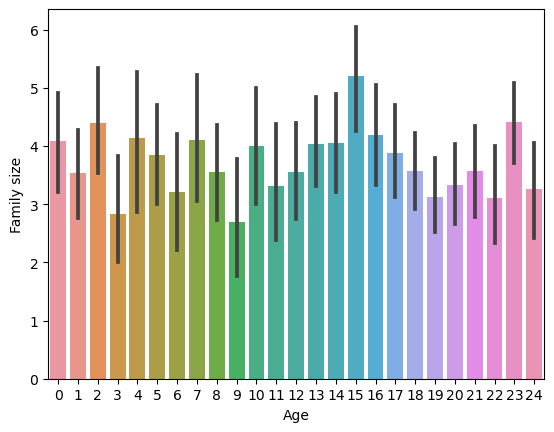

In [15]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(2000).toPandas()
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 25]

sns.barplot(x='Age', y='Family size', data=df_seaborn_selected_ageAndFamilySize)
# Show figure
plt.show()

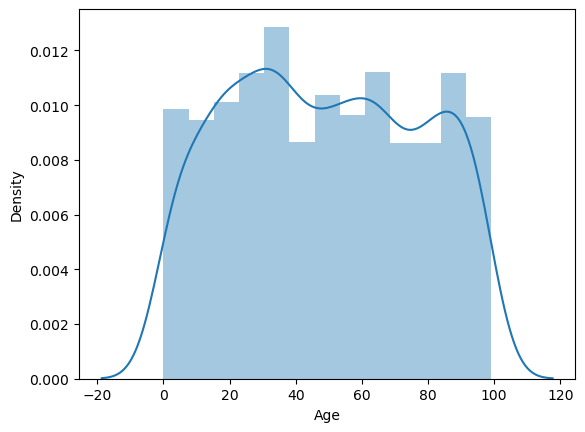

In [16]:
df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(2000).toPandas()
sns.distplot(df_seaborn_selected_ageAndFamilySize.Age)
plt.show()

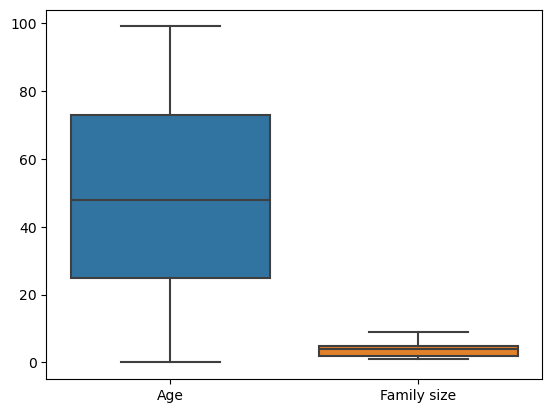

In [17]:
df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(2000).toPandas()
sns.boxplot(data=df_seaborn_selected_ageAndFamilySize[['Age','Family size']])
plt.show()

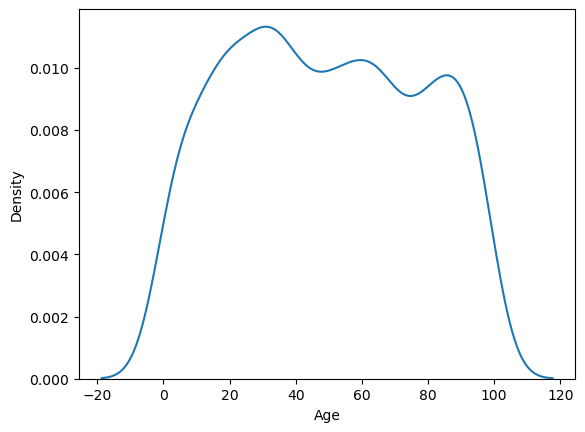

In [18]:
df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(2000).toPandas()
sns.kdeplot(df_seaborn_selected_ageAndFamilySize.Age)
plt.show()

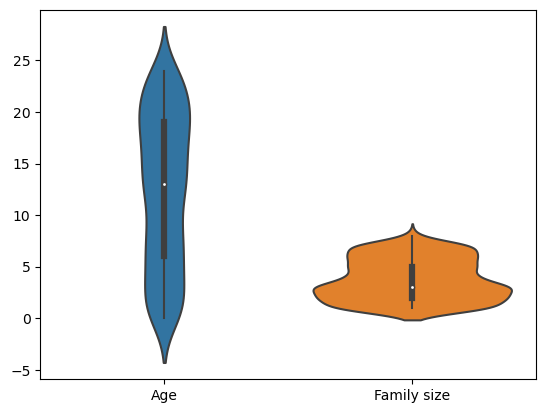

In [19]:
df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(2000).toPandas()
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 25]
sns.violinplot(data=df_seaborn_selected_ageAndFamilySize[['Age','Family size']])
plt.show()

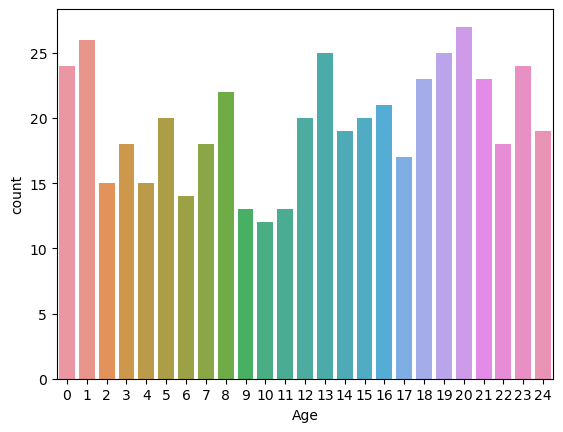

In [20]:
df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(2000).toPandas()
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 25]
sns.countplot(x='Age', data=df_seaborn_selected_ageAndFamilySize)
plt.show()

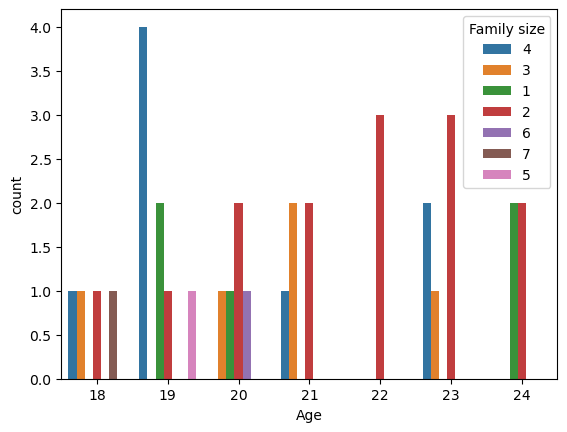

In [21]:
df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(200).toPandas()

df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 25]

df_seaborn_selected_ageAndFamilySize['Family size'] = df_seaborn_selected_ageAndFamilySize['Family size'].astype(str)

sns.countplot(x='Age', data=df_seaborn_selected_ageAndFamilySize, hue='Family size')

plt.show()


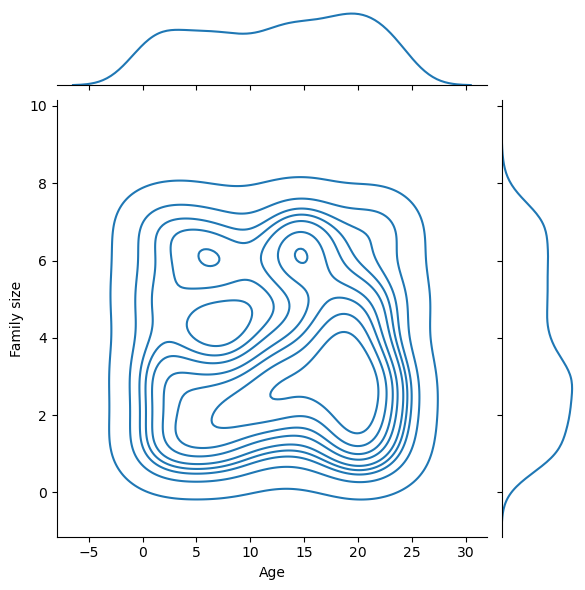

In [22]:
df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(2000).toPandas()
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 25]
sns.jointplot(x='Age', y='Family size', data=df_seaborn_selected_ageAndFamilySize, kind="kde")
plt.show()

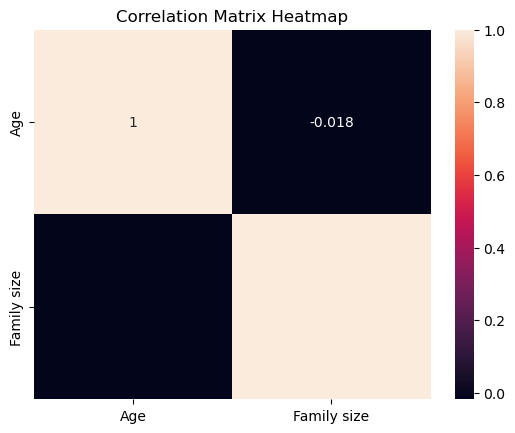

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_matrix = df_seaborn_selected_ageAndFamilySize.corr()

# Plot the heatmap
sns.heatmap(cor_matrix, annot=True)

# Optionally, add titles and labels for clarity
plt.title('Correlation Matrix Heatmap')
plt.show()


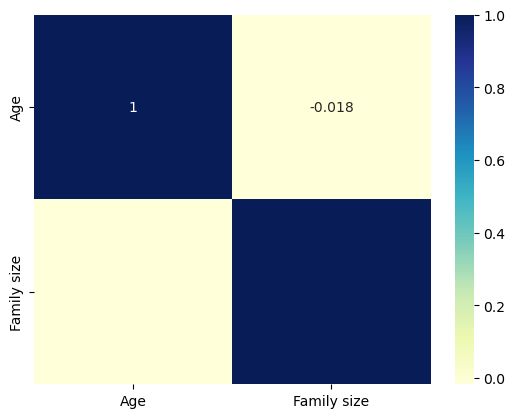

In [24]:
# Create heatmap
sns.heatmap(cor_matrix, annot=True, cmap="YlGnBu")
# Show figure
plt.show()

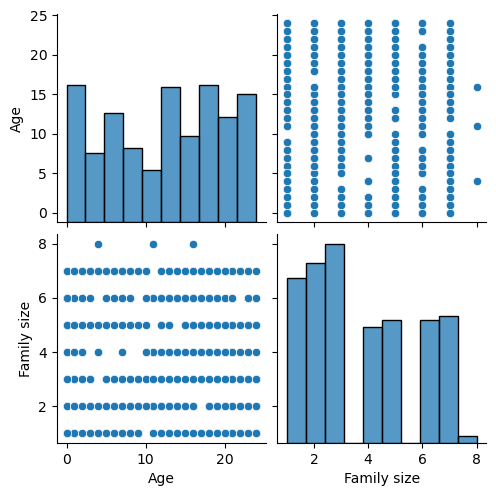

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_seaborn_selected_ageAndFamilySize)
plt.show()


In [26]:
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show

df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(100).toPandas()
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 25]

output_notebook()
fig= figure()
fig.circle(df_seaborn_selected_ageAndFamilySize["Age"], df_seaborn_selected_ageAndFamilySize["Family size"], size = 10, color = "red", alpha = 0.7)
# Show the plot
show(fig)

Loading BokehJS ...

In [27]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show

df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(100).toPandas()
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 25]

output_notebook()
p = figure()
p.line(df_seaborn_selected_ageAndFamilySize["Age"], df_seaborn_selected_ageAndFamilySize["Family size"], color = "blue")
show(p)

Loading BokehJS ...

In [28]:
from bokeh.plotting import figure
from bokeh.plotting import output_notebook, show
from bokeh.layouts import row, column
from bokeh.sampledata.iris import flowers as df

# Output to notebook
output_notebook()
# Instantiate a figure
fig1 = figure()
fig2 = figure()
fig3 = figure()
# Create scatter marker plot by render the circles
fig1.scatter(df_seaborn_selected_ageAndFamilySize['Age'], df_seaborn_selected_ageAndFamilySize['Family size'], size=8, color = "green", alpha = 0.5)
fig2.scatter(df_seaborn_selected_ageAndFamilySize['Age'], df_seaborn_selected_ageAndFamilySize['Age'], size=8, color = "blue", alpha = 0.5)
fig3.scatter(df_seaborn_selected_ageAndFamilySize['Family size'], df_seaborn_selected_ageAndFamilySize['Family size'], size=8, color = "red", alpha = 0.5)
# Create row layout
row_layout = row(fig1, fig2, fig3)
# Show the plot
show(row_layout)

Loading BokehJS ...

In [29]:
col_layout = column(fig1, fig2, fig3)
show(col_layout)

In [30]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.layouts import row, column
from bokeh.sampledata.iris import flowers as df

# Output to notebook
output_notebook()
# Instantiate a figure
fig1 = figure()
fig2 = figure()
fig3 = figure()
# Create scatter marker plot by render the circles
fig1.scatter(df_seaborn_selected_ageAndFamilySize['Age'], df_seaborn_selected_ageAndFamilySize['Family size'], size=8, color ="green", alpha = 0.5)
fig2.scatter(df_seaborn_selected_ageAndFamilySize['Age'], df_seaborn_selected_ageAndFamilySize['Age'], size=8, color = "blue",alpha = 0.5)
fig3.scatter(df_seaborn_selected_ageAndFamilySize['Family size'], df_seaborn_selected_ageAndFamilySize['Family size'], size=8, color = "red",alpha = 0.5)
# Create nested Family size
nasted_layout = row(fig1, column(fig2, fig3))
# Show the plot
show(nasted_layout)

Loading BokehJS ...

In [31]:
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.layouts import gridplot
from bokeh.sampledata.iris import flowers as df

# Output to notebook
output_notebook()
# Instantiate a figure
fig1 = figure()
fig2 = figure()
fig3 = figure()
# Create scatter marker plot by render the circles
fig1.scatter(df_seaborn_selected_ageAndFamilySize['Age'], df_seaborn_selected_ageAndFamilySize['Family size'], size=8, color ="green", alpha = 0.5)
fig2.scatter(df_seaborn_selected_ageAndFamilySize['Age'], df_seaborn_selected_ageAndFamilySize['Age'], size=8, color = "blue",alpha = 0.5)
fig3.scatter(df_seaborn_selected_ageAndFamilySize['Family size'], df_seaborn_selected_ageAndFamilySize['Family size'], size=8, color = "red",alpha = 0.5)
# Create a grid layout
grid_layout = gridplot([[fig1, fig2], [None,fig3]])
# Show the plot
show(grid_layout)

Loading BokehJS ...

In [32]:
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import CategoricalColorMapper



df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(200).toPandas()
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 50]

# Output to the notebook
output_notebook()

# Instantiate a figure object
fig = figure(title="Age and Family Size", x_axis_label='Age', y_axis_label='Family Size')

# Define your age categories and corresponding colors
age_categories = [18, 19, 20]
colors = ['blue', 'green', 'red']

# Create scatter plots for each age category
for age, color in zip(age_categories, colors):
    # Filter data for the current age
    data = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] == age]
    # Create a ColumnDataSource from the filtered data
    source = ColumnDataSource(data)
    # Plot the circles for this subset
    fig.scatter('Age', 'Family size', size=8, color=color, alpha=0.7, legend_label=str(age), source=source)

# Configure the legend
fig.legend.location = 'top_left'
fig.legend.click_policy = "hide"

# Show the plot
show(fig)


AttributeError: 'DataFrame' object has no attribute 'select'

In [ ]:
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import CategoricalColorMapper



df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(200).toPandas()
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 50]

# Output to the notebook
output_notebook()

# Instantiate a figure object
fig = figure(title="Age and Family Size", x_axis_label='Age', y_axis_label='Family Size')

# Define your age categories and corresponding colors
age_categories = [18, 19, 20]
colors = ['blue', 'green', 'red']

# Create scatter plots for each age category
for age, color in zip(age_categories, colors):
    # Filter data for the current age
    data = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] == age]
    # Create a ColumnDataSource from the filtered data
    source = ColumnDataSource(data)
    # Plot the circles for this subset
    fig.scatter('Age', 'Family size', size=8, color=color, alpha=0.7, legend_label=str(age), source=source,muted_color=color, muted_alpha=0.2)

# Configure the legend
fig.legend.location = 'top_left'
fig.legend.click_policy = "mute"

# Show the plot
show(fig)


In [ ]:
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import CategoricalColorMapper
import pandas as pd

df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(200).toPandas()
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 25]

# Convert Age to string if it's not already, because CategoricalColorMapper expects strings
df_seaborn_selected_ageAndFamilySize['Age'] = df_seaborn_selected_ageAndFamilySize['Age'].astype(str)

# Output to notebook
output_notebook()

# Create a ColumnDataSource from the DataFrame
source = ColumnDataSource(df_seaborn_selected_ageAndFamilySize)

# Create color mapper for 'Age' categories
color_mapper = CategoricalColorMapper(factors=['18', '19', '20','21','22','23','24'], palette=['blue', 'green', 'red','black','yellow','orange','pink'])

# Instantiate a figure object
p = figure( title="Age vs. Family Size",
           x_axis_label='Age', y_axis_label='Family Size')

# Create scatter marker plot by rendering the circles
p.circle('Age', 'Family size', size=8, color={'field': 'Age', 'transform': color_mapper},
         alpha=0.5, legend_group='Age', source=source)

# Set the legend location
p.legend.location = 'top_left'

# Show the plot
show(p)


In [ ]:
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.models import CategoricalColorMapper
from bokeh.models import HoverTool



df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(200).toPandas()
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 25]

# Output to the notebook
output_notebook()

hover = HoverTool(tooltips=[('Age','@Age'),
 ('Family size','@{Family size}')])

# Instantiate a figure object
fig = figure(title="Age and Family Size", x_axis_label='Age', y_axis_label='Family Size',tools=[hover, 'pan', 'wheel_zoom'])

# Define your age categories and corresponding colors
age_categories = [18, 19, 20]
colors = ['blue', 'green', 'red']

# Create scatter plots for each age category
for age, color in zip(age_categories, colors):
    # Filter data for the current age
    data = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] == age]
    # Create a ColumnDataSource from the filtered data
    source = ColumnDataSource(data)
    # Plot the circles for this subset
    fig.scatter('Age', 'Family size', size=8, color=color, alpha=0.7, legend_label=str(age), source=source,muted_color=color, muted_alpha=0.2)

# Configure the legend
fig.legend.location = 'top_left'
fig.legend.click_policy = "mute"

# Show the plot
show(fig)


In [ ]:
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.models.widgets import Tabs
from bokeh.models.widgets import Panel

# Output to notebook
output_notebook()
# Instantiate a figure
fig1 = figure()
fig2 = figure()
# Create scatter marker plot by render the circles
fig1.circle(df_seaborn_selected_ageAndFamilySize['Age'], df_seaborn_selected_ageAndFamilySize['Family size'], size=8, color = "green", alpha = 0.5)
fig2.circle(df_seaborn_selected_ageAndFamilySize['Family size'], df_seaborn_selected_ageAndFamilySize['Age'], size=8, color = "blue", alpha = 0.5)
# Create panels
tab1 = Panel(child=fig1, title='tab1')
tab2 = Panel(child=fig2, title='tab2')
# Create tab by putting panels into it
tab_layout = Tabs(tabs=[tab1,tab2])
# Show the plot
show(tab_layout)


In [ ]:
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import CategoricalColorMapper, HoverTool, Slider
from bokeh.layouts import column
from bokeh.models.callbacks import CustomJS
import pandas as pd

# Simulating the DataFrame
# df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(200).toPandas()
df_seaborn_selected_ageAndFamilySize = df.select("Age", "Family size").limit(200).toPandas()
df_seaborn_selected_ageAndFamilySize = df_seaborn_selected_ageAndFamilySize[df_seaborn_selected_ageAndFamilySize['Age'] < 25]

# Output to notebook
output_notebook()

# Add HoverTool
hover = HoverTool(tooltips=[('Age', '@Age'), ('Family size', '@{Family size}')])

# Instantiate a figure object
fig = figure(title="Age and Family Size", x_axis_label='Age', y_axis_label='Family Size', tools=[hover, 'pan', 'wheel_zoom'])

# Convert DataFrame to ColumnDataSource
source = ColumnDataSource(df_seaborn_selected_ageAndFamilySize)

# Create scatter plots for the dataset
fig.scatter('Age', 'Family size', size=8, color='blue', alpha=0.7, source=source)

# Slider to control the Age filter
age_slider = Slider(start=df_seaborn_selected_ageAndFamilySize['Age'].min(), end=df_seaborn_selected_ageAndFamilySize['Age'].max(), value=20, step=1, title="Filter by Age")

# Define the callback to filter the plot based on slider value
callback = CustomJS(args=dict(source=source, slider=age_slider, original_source=df_seaborn_selected_ageAndFamilySize.to_dict('list')), code="""
    const data = source.data;
    const age = slider.value;
    const new_data = { 'Age': [], 'Family size': [] };
    const original_data = original_source;
    
    for (let i = 0; i < original_data['Age'].length; i++) {
        if (original_data['Age'][i] <= age) {
            new_data['Age'].push(original_data['Age'][i]);
            new_data['Family size'].push(original_data['Family size'][i]);
        }
    }
    
    source.data = new_data;
    source.change.emit();
""")

age_slider.js_on_change('value', callback)

# Organize the layout
layout = column(fig, age_slider)

# Show the plot and slider
show(layout)
